In [ ]:
# AIM: To Decrypt a text using MCMC approach. i.e. find decryption key which we will call cipher from now on.
import string
import math
import random

# This function takes as input a decryption key and creates a dict for key where each letter in the decryption key
# maps to a alphabet For example if the decryption key is "DGHJKL...." this function will create a dict like {D:A,G:B,H:C....} 
def create_cipher_dict(cipher):
    cipher_dict = {}
    alphabet_list = list(string.ascii_uppercase)
    for i in range(len(cipher)):
        cipher_dict[alphabet_list[i]] = cipher[i]
    return cipher_dict

# This function takes a text and applies the cipher/key on the text and returns text.//text here is corrected one and cipher is encryption key
def apply_cipher_on_text(text,cipher):
    cipher_dict = create_cipher_dict(cipher) 
    text = list(text)
    newtext = ""
    for elem in text:
        if elem.upper() in cipher_dict:
            newtext+=cipher_dict[elem.upper()]
        else:
            newtext+=" "
    return newtext

In [ ]:
# This function takes as input a path to a long text and creates scoring_params dict which contains the 
# number of time each pair of alphabet appears together
# Ex. {'AB':234,'TH':2343,'CD':23 ..}
def create_scoring_params_dict(longtext_path):
    scoring_params = {}
    alphabet_list = list(string.ascii_uppercase)
    with open(longtext_path) as fp:
        for line in fp:
            data = list(line.strip())
            for i in range(len(data)-1):
                alpha_i = data[i].upper()
                alpha_j = data[i+1].upper()
                if alpha_i not in alphabet_list and alpha_i != " ":
                    alpha_i = " "
                if alpha_j not in alphabet_list and alpha_j != " ":
                    alpha_j = " "
                key = alpha_i+alpha_j
                if key in scoring_params:
                    scoring_params[key]+=1
                else:
                    scoring_params[key]=1
    return scoring_params

# This function takes as input a text and creates scoring_params dict which contains the 
# number of time each pair of alphabet appears together
# Ex. {'AB':234,'TH':2343,'CD':23 ..}
#text = DEcoded 
def score_params_on_cipher(text):
    scoring_params = {}
    alphabet_list = list(string.ascii_uppercase)
    data = list(text.strip())
    for i in range(len(data)-1):
        alpha_i =data[i].upper()
        alpha_j = data[i+1].upper()
        if alpha_i not in alphabet_list and alpha_i != " ":
            alpha_i = " "
        if alpha_j not in alphabet_list and alpha_j != " ":
            alpha_j = " "
        key = alpha_i+alpha_j
        if key in scoring_params:
            scoring_params[key]+=1
        else:
            scoring_params[key]=1
    return scoring_params

# This function takes the text to be decrypted and a cipher to score the cipher.
# This function returns the log(score) metric

def get_cipher_score(text,cipher,scoring_params,plain_text):
    cipher_dict = create_cipher_dict(cipher)#Dict is mapping the alphabet to key
    decrypted_text = apply_cipher_on_text(text,cipher)
    scored_f = score_params_on_cipher(decrypted_text)#We get array of no of pairs of words
    cipher_score = 0
    for k,v in scored_f.items():
        if k in scoring_params:
            cipher_score += v*math.log(scoring_params[k])
    my_score = 0
    for i in range(len(plain_text)):
        my_score+=int(plain_text[i]==decrypted_text[i])
    fraction = my_score/len(plain_text)
    return cipher_score,fraction



In [ ]:
# Generate a proposal cipher by swapping letters at two random location
def generate_cipher(cipher):
    pos1 = random.randint(0, len(list(cipher))-1)
    pos2 = random.randint(0, len(list(cipher))-1)
    if pos1 == pos2:
        return generate_cipher(cipher)
    else:
        cipher = list(cipher)
        pos1_alpha = cipher[pos1]
        pos2_alpha = cipher[pos2]
        cipher[pos1] = pos2_alpha
        cipher[pos2] = pos1_alpha
        return "".join(cipher)

# Toss a random coin with robability of head p. If coin comes head return true else false.
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True

In [ ]:
# Takes as input a text to decrypt and runs a MCMC algorithm for n_iter. Returns the state having maximum score and also
# the last few states 
# Cipher test = incorrect text
def MCMC_decrypt(n_iter,cipher_text,scoring_params,plain_text):

    current_cipher = string.ascii_uppercase # Generate a random key to start
    state_keeper = set()
    best_state = ''
    score = 0
    history = []
    for i in range(n_iter):
        state_keeper.add(current_cipher)
        proposed_cipher = generate_cipher(current_cipher)
        score_current_cipher,fraction1 = get_cipher_score(cipher_text,current_cipher,scoring_params,plain_text)
        score_proposed_cipher,fraction2 = get_cipher_score(cipher_text,proposed_cipher,scoring_params,plain_text)
        acceptance_probability = min(1,math.exp(score_proposed_cipher-score_current_cipher))
        if score_current_cipher>score:
            best_state = current_cipher
        if random_coin(acceptance_probability):
            current_cipher = proposed_cipher
        if i%500==0:
            history.append(fraction2)
            print("iter",i,":",apply_cipher_on_text(cipher_text,current_cipher)[0:99])
    return state_keeper,best_state,history

In [ ]:
## Run the Main Program:

scoring_params = create_scoring_params_dict('War_and_Peace.txt')

plain_text = "I am your faithfulslave, and I can confess it to you alone .My children are the stumbling-blocks of my existence. This is my cross. That is the way that I explain it to myself.Que voulez -vous"

encryption_key = "XEBPROHYAUFTIDSJLKZMWVNGQC"
cipher_text = apply_cipher_on_text(plain_text,encryption_key)#We get now an incorrect form of the text
decryption_key = "ICZNBKXGMPRQTWFDYEOLJVUAHS"

print("Text To Decode:", cipher_text)
print("\n")
states,best_state,history = MCMC_decrypt(10000,cipher_text,scoring_params,plain_text)#Scoring params no of times a pair appeares in the given book,plain text = correct text
print("\n")
print("Decoded Text:",apply_cipher_on_text(cipher_text,best_state))
print("\n")
print("MCMC KEY FOUND:",best_state)
print("ACTUAL DECRYPTION KEY:",decryption_key)


Text To Decode: A XI QSWK OXAMYOWTZTXVR  XDP A BXD BSDORZZ AM MS QSW XTSDR  IQ BYATPKRD XKR MYR ZMWIETADH ETSBFZ SO IQ RGAZMRDBR  MYAZ AZ IQ BKSZZ  MYXM AZ MYR NXQ MYXM A RGJTXAD AM MS IQZRTO LWR VSWTRC  VSWZ


iter 0 : A XI QSWK OXAMYOWTZTXVR  XDP A BXD BSDORZZ AM MS QSW XTSDR  IQ BYATPKRD XKR MYR ZMWIETADH ETSBFZ SO
iter 500 : A IB UOMY VIATHVMSRSICE  INK A LIN LONVERR AT TO UOM ISONE  BU LHASKYEN IYE THE RTMBWSANG WSOLDR OV
iter 1000 : I AB YOUN MAITHMULSLACE  ARG I WAR WORMESS IT TO YOU ALORE  BY WHILGNER ANE THE STUBPLIRZ PLOWKS OM
iter 1500 : I AM YOUR DAITHDULSLAFE  ANB I CAN CONDESS IT TO YOU ALONE  MY CHILBREN ARE THE STUMPLING PLOCKS OD
iter 2000 : I AM YOUL DAITHDURSRAWE  ANG I CAN CONDESS IT TO YOU ARONE  MY CHIRGLEN ALE THE STUMPRINZ PROCKS OD
iter 2500 : I AM YOUL DAITHDURSRABE  ANG I CAN CONDESS IT TO YOU ARONE  MY CHIRGLEN ALE THE STUMPRINF PROCKS OD
iter 3000 : A IM YOUL DIATHDURSRIBE  ING A CIN CONDESS AT TO YOU IRONE  MY CHARGLEN ILE THE STUMPRANZ PROCKS OD
iter 3500

[0.18229166666666666, 0.18229166666666666, 0.19791666666666666, 0.21875, 0.21354166666666666, 0.21354166666666666, 0.19791666666666666, 0.19270833333333334, 0.19270833333333334, 0.203125, 0.21875, 0.21875, 0.21875, 0.21354166666666666, 0.21875, 0.21354166666666666, 0.21354166666666666, 0.20833333333333334, 0.19791666666666666, 0.19791666666666666]


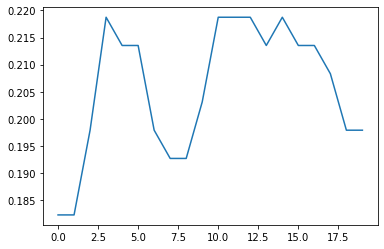

In [ ]:
import matplotlib.pyplot as plt
print(history)
n_iter = 10000//500
x = [i for i in range(n_iter)]
plt.plot(x,history)